# The Look E-Commerce

Dibuat Oleh: [Ivan Yapputra Yappi](https://github.com/Vayxius)

---

## Deployment

[![Deploy to Heroku](https://www.herokucdn.com/deploy/button.svg)](https://milestone-one.herokuapp.com/)

## Problems

CEO toko online "The Look" mencurigai bahwa ada yang tidak beres dari sistem penjualan di tokonya, dari performa penjualan produk, pengiriman barang, dsb. Mohon bantu ungkapkan apakah bermasalah atau tidak dari sistem penjualan di platformnya. Gunakan dataset `thelook_ecommerce` di Google Cloud Platform BigQuery.

## Problem Identification

- Berapa rata-rata pendapatan kotor toko the look berdasarkan tanggal? (Data Visualisasi)
- Berapa persentase penjualan yang berhasil dijual, dibatalkan, dikembalikan, sedang dikirim, dan dikemas? (Data Visualisasi)
- Berapa nilai minimum, maksimum, mean, median, dan modus di toko `the look` berdasarkan quantity? (Statistik Deskriptif)
- Merchant mana yang jumlah penjualannya paling besar dan kecil? (Data Visualisasi)
- Pada bulan manakah puncak rata-rata pendapatan pada merchant yang memiliki total penjualan tinggi? (Data Visualisasi)
- Usia berapa yang sering banyak belanja pada merchant yang memiliki total penjualan tertinggi? (Data Visualisasi)
- Melakukan uji hipotesis untuk mengetahui apakah rata-rata penjualan produk dari merchant yang penjualan produknya tertinggi memiliki perbedaan signifikan dengan merchant yang penjualan produknya terendah? (Inferensial, Uji Hipotesis)

---

## Data Retrieve (Query From Google Cloud)

```  mysql
SELECT items.created_at, products.name, products.category, products.brand, products.cost, distribution.name as distribution_name, products.department, items.sale_price, users.id, orders.gender, users.age, users.country, orders.num_of_item, items.status, users.traffic_source
FROM `bigquery-public-data.thelook_ecommerce.order_items` items
LEFT JOIN `bigquery-public-data.thelook_ecommerce.orders` orders
ON items.order_id = orders.order_id
LEFT JOIN `bigquery-public-data.thelook_ecommerce.products` products
ON items.product_id = products.id
LEFT JOIN `bigquery-public-data.thelook_ecommerce.users` users
ON items.user_id = users.id
LEFT JOIN `bigquery-public-data.thelook_ecommerce.distribution_centers` distribution
ON products.distribution_center_id = distribution.id
```

Query diatas adalah salinan yang sudah dibuat di Google Cloud Big Query menggunakan dataset `thelook_ecommerce`.

## Working Area

### Import Library

Import semua library yang akan digunakan dalam project Milestones 1.

In [1]:
import matplotlib.pyplot as plt
from scipy import stats
import seaborn as sns
import pandas as pd
import numpy as np
import warnings
warnings.filterwarnings('ignore')

Dalam project Milestones 1 ini, library yang digunakan yaitu Matplotlib, Scipy, Seaborn, Pandas dan NumPy.

### Data Loading

Bagian ini berisi proses data loading yang kemudian dilanjutkan dengan gambaran data.

Memuat semua data yang berada di dalam file `h8dsft_Milestone1_TheLook_Ecommerce.csv`.

In [2]:
# Load data from h8dsft_Milestone1_TheLook_Ecommerce.csv
df = pd.read_csv('TheLook_Ecommerce.csv')

Membuat variable baru untuk dataframe dengan nama `df`.

### Data Overview

In [3]:
df

,created_at,name,category,brand,cost,distribution_name,department,sale_price,id,gender,age,country,num_of_item,status,traffic_source
0,2020-06-05 07:06:16 UTC,Allegra K Lady Stripes Upper Stretchy Waist Si...,Jumpsuits & Rompers,Allegra K,6.62400,Charleston SC,Women,12.000000,29175,F,20,China,1,Shipped,Search
1,2019-08-26 07:18:41 UTC,Allegra K Lady Stripes Upper Stretchy Waist Si...,Jumpsuits & Rompers,Allegra K,6.62400,Charleston SC,Women,12.000000,35279,F,52,South Korea,2,Shipped,Search
2,2020-02-16 22:36:13 UTC,Allegra K Lady Stripes Upper Stretchy Waist Si...,Jumpsuits & Rompers,Allegra K,6.62400,Charleston SC,Women,12.000000,51913,F,46,China,1,Shipped,Organic
3,2019-11-08 04:04:22 UTC,Allegra K XS Grn Elastic Waist Ruffle Hem Shor...,Jumpsuits & Rompers,Allegra K,6.33600,Charleston SC,Women,12.000000,57005,F,61,South Korea,1,Shipped,Display
4,2022-02-17 14:32:28 UTC,Allegra K Lady Stripes Upper Stretchy Waist Si...,Jumpsuits & Rompers,Allegra K,6.62400,Charleston SC,Women,12.000000,52003,F,16,Belgium,2,Complete,Search
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
181797,2020-08-17 01:35:28 UTC,Allegra K Ladies Long Sleeve Solid Plush Patch...,Fashion Hoodies & Sweatshirts,Allegra K,10.40296,Charleston SC,Women,23.860001,83450,F,52,China,1,Shipped,Search
181798,2022-03-29 08:47:41 UTC,Allegra K Ladies Long Sleeve Solid Plush Patch...,Fashion Hoodies & Sweatshirts,Allegra K,10.40296,Charleston SC,Women,23.860001,28486,F,16,South Korea,1,Complete,Organic
181799,2021-06-10 03:32:50 UTC,Allegra K Ladies Long Sleeve Solid Plush Patch...,Fashion Hoodies & Sweatshirts,Allegra K,10.40296,Charleston SC,Women,23.860001,54792,F,68,France,1,Complete,Display
181800,2021-08-04 12:07:16 UTC,Allegra K Ladies Long Sleeve Solid Plush Patch...,Fashion Hoodies & Sweatshirts,Allegra K,10.40296,Charleston SC,Women,23.860001,33393,F,59,South Korea,1,Returned,Organic


Melihat 5 data teratas dan 5 data terbawah dari dataframe `df`.

In [4]:
df.shape # Returns tuple of shape (Rows, columns) of dataframe df.

(181802, 15)

Melihat bentuk dari `df`, dataset ini terdiri dari 181.802 baris, dan 15 kolom.

In [5]:
df.info() # Return informasi dari dataframe df.

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 181802 entries, 0 to 181801
Data columns (total 15 columns):
 #   Column             Non-Null Count   Dtype  
---  ------             --------------   -----  
 0   created_at         181802 non-null  object 
 1   name               181787 non-null  object 
 2   category           181802 non-null  object 
 3   brand              181657 non-null  object 
 4   cost               181802 non-null  float64
 5   distribution_name  181802 non-null  object 
 6   department         181802 non-null  object 
 7   sale_price         181802 non-null  float64
 8   id                 181802 non-null  int64  
 9   gender             181802 non-null  object 
 10  age                181802 non-null  int64  
 11  country            181802 non-null  object 
 12  num_of_item        181802 non-null  int64  
 13  status             181802 non-null  object 
 14  traffic_source     181802 non-null  object 
dtypes: float64(2), int64(3), object(10)
memory usage: 2

Pada dataset ini dapat dilihat bahwa dataframe `df` terdiri dari 15 kolom, dengan 3 tipe data yang berbeda yaitu:
- 2 kolom bertipe data float.
- 3 kolom bertipe data integer.
- 10 kolom bertipe data object.

In [6]:
df.describe().T # Summary Statistic from column load_weight

,count,mean,std,min,25%,50%,75%,max
cost,181802.0,28.721899,30.731513,0.0083,11.375000,19.896021,34.749000,557.151002
sale_price,181802.0,59.753625,66.448999,0.0200,24.879999,39.990002,69.970001,999.000000
id,181802.0,49892.593145,28869.722791,3.0000,24842.000000,49838.500000,74936.750000,99997.000000
age,181802.0,40.977244,17.028675,12.0000,26.000000,41.000000,56.000000,70.000000
num_of_item,181802.0,1.897559,1.062065,1.0000,1.000000,2.000000,2.000000,4.000000


Menampilkan ringkasan statistik dari dataframe `df` dengan tipe data numeric, hasil data diatas menampilkan:
- rata-rata.
- standar deviasi.
- nilai minimum.
- kuartil.
- nilai maksimum.

Berdasarkan Data Overview diatas, diketahui bahwa:
- Missing value pada kolom `name` yang menampilkan 181.787 baris data dan kolom `brand` yang menampilkan 181.657 baris data dari 181.802 baris data.
- Minimal nilai pada kolom `cost` dan kolom `sale_price` hampir sama dengan 0, akan dicek apakah terdapat anomali atau tidak.
- Rentang usia dari 12 sampai 70 tahun.

### Data Cleaning

Bagian ini berisi proses penyiapan data berupa data cleaning sebelum dilakukan explorasi data lebih lanjut.

#### Missing Value

Melakukan pemeriksaan terhadap dataframe `df` berapa banyak missing value yang ada.

In [7]:
df.isna().sum()

created_at             0
name                  15
category               0
brand                145
cost                   0
distribution_name      0
department             0
sale_price             0
id                     0
gender                 0
age                    0
country                0
num_of_item            0
status                 0
traffic_source         0
dtype: int64

Terdapat missing value pada kolom `name` sebanyak 15 data dan kolom `brand` sebanyak 145 data.

In [8]:
df.dropna(inplace=True)

Menghilangkan missing value dengan mengeluarkan/menghapus baris data yang memiliki value `null`.

In [9]:
df.isna().sum()

created_at           0
name                 0
category             0
brand                0
cost                 0
distribution_name    0
department           0
sale_price           0
id                   0
gender               0
age                  0
country              0
num_of_item          0
status               0
traffic_source       0
dtype: int64

Sudah tidak terdapat missing value lagi di dalam dataframe `df`.

#### Rename Column

Agar memudahkan pemanggilan kolom pada saat explorasi data, maka akan dilakukan perubahan nama label pada kolom dataframe `df` terlebih dahulu.

In [10]:
df.head(1)

,created_at,name,category,brand,cost,distribution_name,department,sale_price,id,gender,age,country,num_of_item,status,traffic_source
0,2020-06-05 07:06:16 UTC,Allegra K Lady Stripes Upper Stretchy Waist Si...,Jumpsuits & Rompers,Allegra K,6.624,Charleston SC,Women,12.0,29175,F,20,China,1,Shipped,Search


Menampilkan dataframe `df` sebelum perubahan kolom terjadi.

In [11]:
df.rename(columns={"name": "product_name",
                    "category": "product_category",
                    "brand": "product_brand",
                    "cost": "product_cost",
                    "distribution_name": "distribution", 
                    "id": "user_id",
                    "num_of_item": "quantity"}, inplace=True)

Melakukan perubahan nama label terhadap kolom yang ada di dalam dataframe `df`.

In [12]:
df.head(1)

,created_at,product_name,product_category,product_brand,product_cost,distribution,department,sale_price,user_id,gender,age,country,quantity,status,traffic_source
0,2020-06-05 07:06:16 UTC,Allegra K Lady Stripes Upper Stretchy Waist Si...,Jumpsuits & Rompers,Allegra K,6.624,Charleston SC,Women,12.0,29175,F,20,China,1,Shipped,Search


Penamaan label di setiap kolom dataframe `df` sudah terubah.

#### Create Column

Menambahkan kolom `income` untuk menampilkan pendapatan yang dihasilkan dari suatu produk.

In [13]:
df['income'] = (df['sale_price'] - df['product_cost']) * df['quantity']

In [14]:
df.head(1)

,created_at,product_name,product_category,product_brand,product_cost,distribution,department,sale_price,user_id,gender,age,country,quantity,status,traffic_source,income
0,2020-06-05 07:06:16 UTC,Allegra K Lady Stripes Upper Stretchy Waist Si...,Jumpsuits & Rompers,Allegra K,6.624,Charleston SC,Women,12.0,29175,F,20,China,1,Shipped,Search,5.376


kolom `income` sudah ditambahkan Pada dataframe `df`. 

### Data Exploration

Bagian ini berisi explorasi data pada dataframe `df` dengan menggunakan query, grouping, visualisasi sederhana, dan lain sebagainya.

In [15]:
df['created_at'] = pd.to_datetime(df['created_at'])
df['created_at'] = df.created_at.dt.date

In [16]:
df['created_at'] = pd.to_datetime(df['created_at'])

Merubah value date time pada kolom `created_at` hanya menjadi tanggal saja dan merubah tipe data kolom `created_at` menjadi date time.

In [17]:
df['created_at'].sort_values()

23002    2019-01-06
49685    2019-01-06
20961    2019-01-07
57939    2019-01-11
62769    2019-01-12
            ...    
38243    2022-07-10
120377   2022-07-10
30762    2022-07-10
117829   2022-07-10
178110   2022-07-10
Name: created_at, Length: 181642, dtype: datetime64[ns]

Menampilkan Range data penjualan berdasarkan tahun. Diketahui bahwa range data penjualan toko `the look` dari tahun 2019 sampai tahun 2022.

In [18]:
df.groupby(['product_category']).size().sort_values(ascending=False)

product_category
Intimates                        13451
Jeans                            12716
Fashion Hoodies & Sweatshirts    11875
Tops & Tees                      11656
Swim                             11306
Sleep & Lounge                   11256
Shorts                           11090
Sweaters                         10980
Accessories                       9952
Outerwear & Coats                 9177
Active                            9112
Underwear                         7428
Pants                             7164
Socks                             6128
Dresses                           5515
Suits & Sport Coats               5237
Maternity                         5126
Plus                              4325
Socks & Hosiery                   3880
Pants & Capris                    3568
Leggings                          3231
Blazers & Jackets                 3195
Skirts                            2179
Suits                             1041
Jumpsuits & Rompers                860
Clothing

Menampilkan data penjualan berdasarkan produk kategori. Diketahui bahwa produk dengan nama kategori `Intimates` yang paling diminati dan produk dengan nama kategori `Clothing Sets` yang kurang diminati.

In [19]:
df[(df['product_category']=='Intimates')].groupby(['distribution']).size().sort_values(ascending=False)

distribution
Chicago IL                                     2849
Houston TX                                     2142
Charleston SC                                  1578
Memphis TN                                     1504
Mobile AL                                      1317
Savannah GA                                    1180
Port Authority of New York/New Jersey NY/NJ     956
Los Angeles CA                                  897
New Orleans LA                                  674
Philadelphia PA                                 354
dtype: int64

Menampilkan jumlah produk dengan nama kategori `Intimates` yang ada diberbagai merchant. Diketahui bahwa merchant `Chicago IL` dan merchant `Houston TX` memiliki produk dengan nama kategori `Intimates` yang paling banyak sedangkan merchant `Philadelphia PA` memiliki jumlah yang paling sedikit.

In [20]:
df['status'].unique()

array(['Shipped', 'Complete', 'Cancelled', 'Processing', 'Returned'],
      dtype=object)

Diketahui bahwa `status` penjualan produk memiliki berbagai keadaan sebagai berikut:
- Processing: Produk bisa jadi dalam proses packing atau pengiriman, perusahaan belum tentu mendapatkan pendapatan.
- Shipped: Produk sudah dikirim dan sedang dalam perjalanan, perusahaan belum tentu mendapatkan pendapatan.
- Complete: Produk berhasil terjual dan perusahaan mendapatkan pendapatan.
- Cancelled: Pemesanan produk dibatalkan dan perushaan tidak mendapat pendapatan.
- Returned: Produk dikembalikan karena beberapa alasan, perusahaan tidak mendapatkan pendapatan.

- Berapa rata-rata pendapatan kotor toko `the look` berdasarkan tanggal?

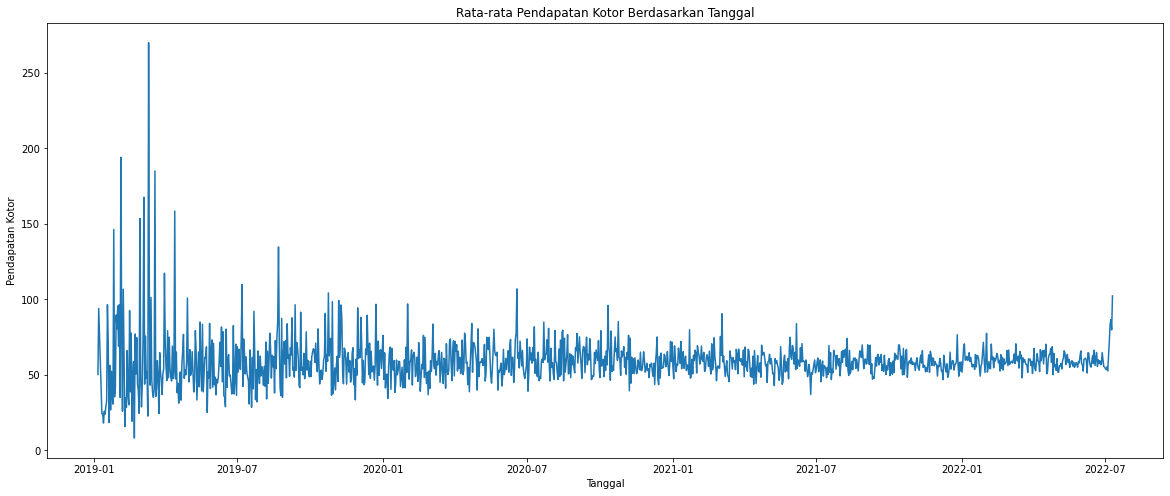

In [21]:
plt.figure(figsize=(20, 8))
plt.plot(df.groupby(df['created_at'])['income'].mean())
plt.title('Rata-rata Pendapatan Kotor Berdasarkan Tanggal')
plt.xlabel('Tanggal')
plt.ylabel('Pendapatan Kotor')
plt.show()

Melakukan plotting untuk melihat rata-rata pendapatan kotor toko `the look` berdasarkan tanggal. 
> Dari grafik diatas dapat dilihat beberapa bulan pada awal tahun 2019 pendapatan rata-rata toko `the look` mengalami kenaikan yang cukup tinggi, pada awal tahun 2020 sampai tahun 2022 rata-rata pendapatan toko `the look` mengalami penurunan, dan pada bulan juli 2022 rata-rata pendapatan toko `the look` menunjukkan adanya kenaikan.

- Berapa persentase penjualan yang berhasil `dijual`, `dibatalkan`, `dikembalikan`, `dikirim`, dan `diproses`?

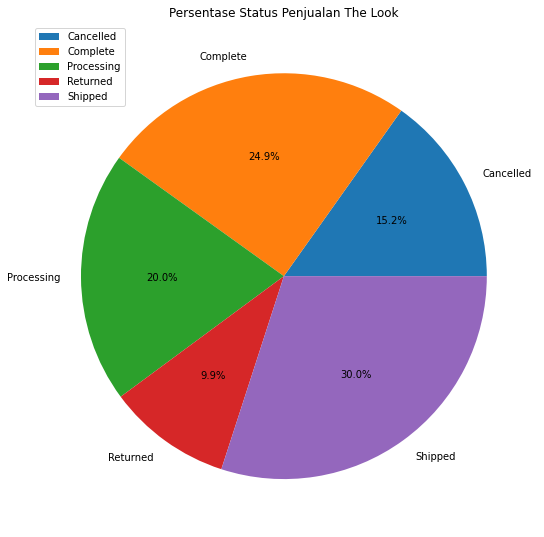

In [22]:
plt.figure(figsize=(20, 10))
plt.subplot(1, 2, 1)
plt.pie(df.groupby('status').size(), labels=df.groupby('status').size().index, autopct='%1.1f%%')
plt.title('Persentase Status Penjualan The Look')
plt.legend(loc='upper left')
plt.show()

> Dapat dilihat dari pie plot di atas bahwa persentase penjualan di toko `the look` dengan persentase paling tinggi adalah penjualan dengan status `Shipped` atau bisa dikatan produk sedang dikirim/dalam perjalanan menuju customer dan persentase paling rendah adalah penjualan dengan status `Returned` atau bisa dikatakan produk dikembalikan. Dapat dilihat juga persentase penjualan dengan status `Complete` atau berhasil terjual sebesar 24.9%, persentase penjualan dengan status `Processing` atau sedang diproses sebesar 20%, dan persentase penjualan dengan status `Cancelled` atau dibatalkan sebesar 15.2%.

- Berapa nilai minimum, maksimum, mean, median, dan modus di toko `the look` berdasarkan `quantity`?

In [23]:
df_complete = df.groupby(['status']).agg(Minimum=('quantity', np.min),
                                        Maximum=('quantity', np.max),
                                        Mean=('quantity', np.mean),
                                        Median=('quantity', np.median), 
                                        Modus=('quantity', stats.mode))
            
df_complete.sort_values(by='Mean', ascending=False)

,Minimum,Maximum,Mean,Median,Modus
status,,,,,
Complete,1,4,1.900267,2.0,"([1], [21769])"
Processing,1,4,1.899964,2.0,"([1], [17634])"
Cancelled,1,4,1.896794,2.0,"([1], [13224])"
Shipped,1,4,1.895559,2.0,"([1], [26344])"
Returned,1,4,1.893189,2.0,"([1], [8605])"


Diketahui bahwa status `Complete` merupakan status dengan nilai rata-rata paling tinggi berdasarkan `quantity` sedangkan status `Returned` atau produk yang dikembalikan merupakan status dengan nilai rata-rata terendah.

- Merchant mana yang jumlah penjualannya paling besar dan kecil? (Data Visualisasi)

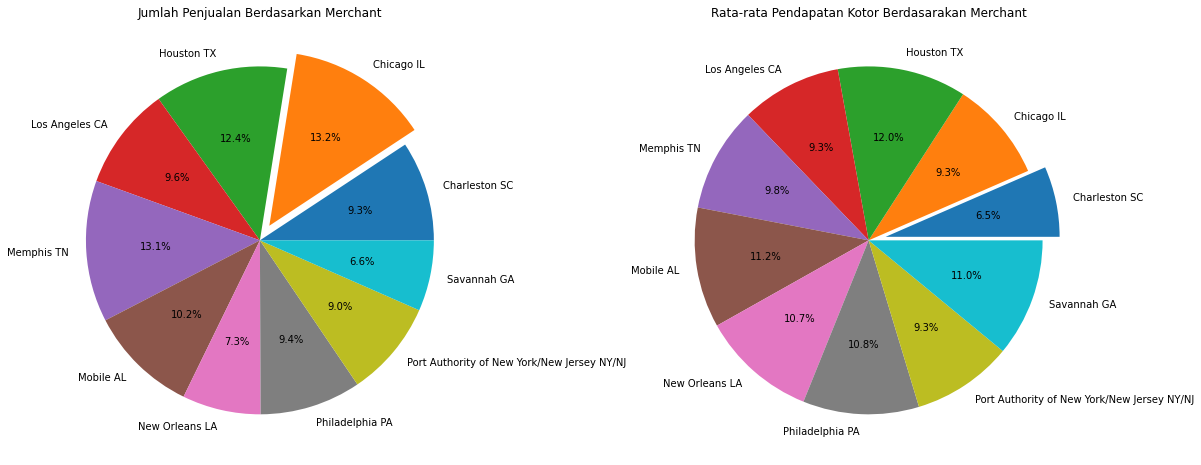

In [24]:
plt.figure(figsize=(20, 8))
plt.subplot(1, 2, 1)
plt.pie(df.groupby('distribution').quantity.sum(), labels=df.groupby('distribution').quantity.sum().index, autopct='%1.1f%%', explode=( 0, 0.1,0, 0, 0, 0, 0, 0, 0, 0))
plt.title('Jumlah Penjualan Berdasarkan Merchant')
plt.subplot(1, 2, 2)
plt.pie(df.groupby('distribution').income.mean(), labels=df.groupby('distribution').income.mean().index, autopct='%1.1f%%', explode=( 0.1, 0, 0, 0, 0, 0, 0, 0, 0, 0))
plt.title('Rata-rata Pendapatan Kotor Berdasarakan Merchant')
plt.show()

> Dapat dilihat dari pie plot di atas merchant `Chicago IL` dan merchant `Memphis TN` adalah merchant dengan total penjualan paling tinggi sedangkan `Savannah GA` adalah merchant dengan total penjualan paling rendah, namun walaupun merchant `Charleston SC` memiliki total penjualan yang lebih tinggi dari merchant `Savannah GA`, merchant `Charleston SC` memiliki persentase pendapatan kotor yang paling rendah. Akan dilakukan sedikit explorasi data yang berkaitan dengan merchant `Chicago IL`.

In [25]:
datas = {
    'Total Transaksi': df[df.distribution == 'Chicago IL'].created_at.count(),  
    'Total Produk Terjual': df[(df.distribution == 'Chicago IL')&(df.status == 'Complete')].quantity.sum(), 
    'Total Produk Diproses': df[(df.distribution == 'Chicago IL')&(df.status == 'Processing')].quantity.sum(), 
    'Total Produk Terkirim': df[(df.distribution == 'Chicago IL')&(df.status == 'Shipped')].quantity.sum(), 
    'Total Produk Dikembalikan': df[(df.distribution == 'Chicago IL')&(df.status == 'Returned')].quantity.sum(), 
    'Total Produk Dibatalkan': df[(df.distribution == 'Chicago IL')&(df.status == 'Cancelled')].quantity.sum(), 
    'Total Purchased Amount': round(df[(df.distribution == 'Chicago IL')&(df.status == 'Complete')].income.sum())
    }
view = pd.DataFrame(datas, index=[''])
view

,Total Transaksi,Total Produk Terjual,Total Produk Diproses,Total Produk Terkirim,Total Produk Dikembalikan,Total Produk Dibatalkan,Total Purchased Amount
,23976,11352,8855,13803,4550,6962,335131


Dapat diketahui dari overview selama 3 tahun bahwa merchant `Chicago IL` memiliki:
- Jumlah transaksi sebanyak 22.621 transaksi
- Jumlah produk terjual sebanyak 11.352 produk
- Jumlah produk diproses sebanyak 8.855 produk
- Jumlah produk dikirim sebanyak 13.803 produk
- Jumlah produk dikembalikan sebanyak 4.550 produk
- Jumlah produk dibatalkan sebanyak 6.962 produk
- Jumlah pedapatan bersih sebesar $335.131

Jumlah pendapatan `income` sebelumnya sudah dihitung berdasarkan kolom `sale_price` yaitu harga jual produk kepada customer dikurangi `product_cost` yaitu biaya pembuatan produk, dan dikalikan `quantity` jumlah produk yang dibeli oleh customer. 

(`income = (sale_price-product_cost)*quantity`).

- Pada bulan manakah puncak rata-rata pendapatan pada merchant yang memiliki total penjualan tinggi? (Data Visualisasi)

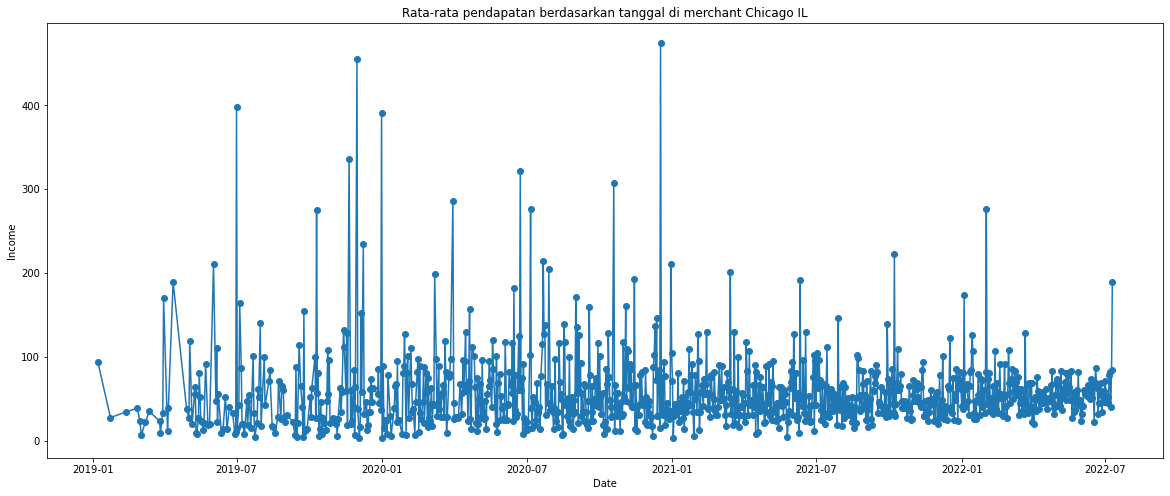

In [26]:
plt.figure(figsize=(20, 8))
plt.plot(df[(df.distribution == 'Chicago IL')&(df.status == 'Complete')].groupby(df.created_at).income.mean(), marker='o')
plt.title('Rata-rata pendapatan berdasarkan tanggal di merchant Chicago IL')
plt.xlabel('Date')
plt.ylabel('Income')
plt.show()

Rata-rata penjualan tertinggi di merchant `Chicago IL` ini berada pada sekitar akhir tahun 2020 dengan rata-rata lebih dari $400.

- Usia berapa yang banyak belanja pada merchant yang memiliki total penjualan tertinggi? (Data Visualisasi)

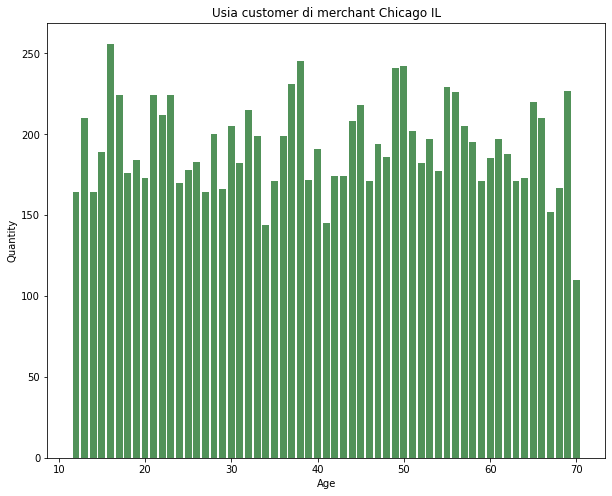

In [27]:
plt.figure(figsize=(10, 8))
ax = plt.bar(df[(df.distribution == 'Chicago IL')&(df.status == 'Complete')].groupby(df.age).quantity.sum().index, df[(df.distribution == 'Chicago IL')&(df.status == 'Complete')].groupby(df.age).quantity.sum(), color='#519259')
plt.title('Usia customer di merchant Chicago IL')
plt.xlabel('Age')
plt.ylabel('Quantity')
plt.show()

> Diketahui bahwa customer pada usia 16 tahun di merchant `Chicago IL` yang paling banyak berbelanja total pembelian produknya lebih dari 250, usia 38 tahun dengan total pembelian lebih dari 200 produk, dan customer yang memiliki total pembelian produk paling rendah berada pada usia 70 tahun. 

- Melakukan uji hipotesis untuk mengetahui apakah rata-rata penjualan produk dari merchant yang penjualan produknya tertinggi memiliki perbedaan signifikan dengan merchant yang penjualan produknya terendah? (Inferensial, Uji Hipotesis)

Karena merchant `Chicago IL` adalah merchant dengan penjualan produk paling tinggi dan merchant `Savannah GA` adalah merchant dengan penjualan produk paling rendah, maka akan menggunakan two sample t-test dengan significant threshold sebesar 0.05:
- Null Hypothesis (H0): μ Chicago IL = μ Savannah GA
- Alternative Hypothesis (H1): μ Chicago IL != μ Savannah GA

In [28]:
significant_threshold = 0.05

Menghitung total penjualan produk dari merchant `Chicago IL` dan `Savannah GA`.

In [29]:
chicago_qty = df[(df.distribution == 'Chicago IL')&(df.status == 'Complete')].groupby(df.created_at).quantity.sum()
savannah_qty = df[(df.distribution == 'Savannah GA')&(df.status == 'Complete')].groupby(df.created_at).quantity.sum()

In [30]:
print(f'Chicago IL average quantity {round(chicago_qty.mean())}')
print(f'Savannah GA average quantity {round(savannah_qty.mean())}')

Chicago IL average quantity 11
Savannah GA average quantity 6


Rata-rata penjualan di merchant `Chicago IL` sekitar 11 produk sedangkan merchant `Savannah GA` sekitar 6 produk. Selanjutnya melakukan uji hipotesis two sampel t-test dengan menggunakan fungsi ttest_ind() dari scipy.stats.

In [31]:
tstat, pvalue = stats.ttest_ind(chicago_qty, savannah_qty)

In [32]:
print(f'P-value {pvalue}')
print(f'T-stat {tstat}')

P-value 1.0163980723248351e-27
T-stat 11.083548965972215


Dari hasil uji hipotesis ini p-value kurang dari 0.05. Jadi pada uji hipotesis ini `H0 rejected`, maka disimpulkan bahwa perbedaan rata-rata penjualan pada merchant `Chicago IL` dan `Savannah GA` di toko `the look` ini signifikan.

In [33]:
chicago_pop = np.random.normal(chicago_qty.mean(), chicago_qty.std(), 10000)
savannah_pop = np.random.normal(savannah_qty.mean(), savannah_qty.std(), 10000)

Membuat populasi dari merchant `Chicago IL` dan merchant `Savannah GA` sebanyak 10000 baris data.

In [34]:
ci = stats.norm.interval(0.95, loc=chicago_qty.mean(), scale=chicago_qty.std())

Menghitung Confidence Interval.

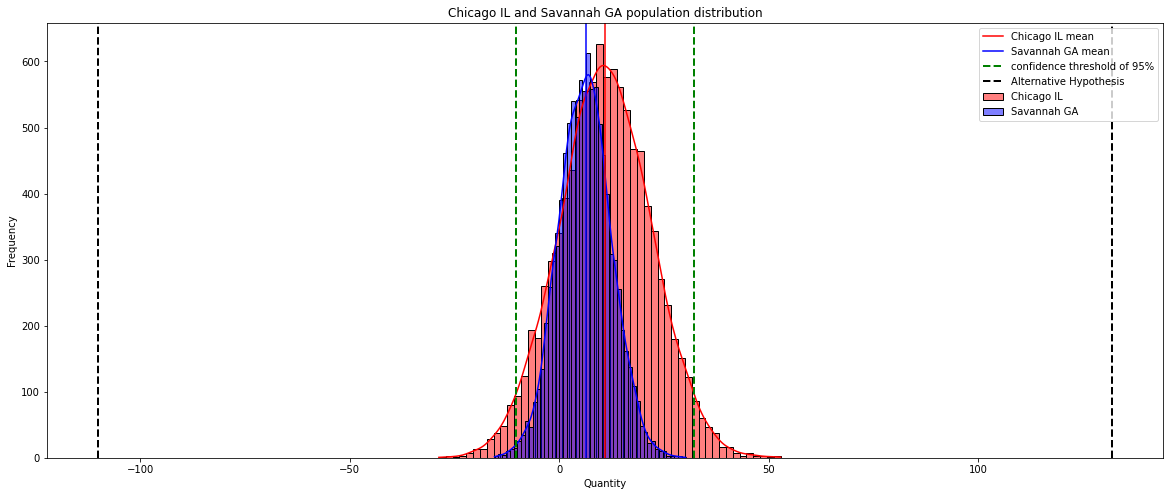

In [35]:
plt.figure(figsize=(20, 8))
sns.histplot(chicago_pop, bins=50, label='Chicago IL', color='red', kde=True)
sns.histplot(savannah_pop, bins=50, label='Savannah GA', color='blue', kde=True)
plt.axvline(x=chicago_qty.mean(), color='red', label='Chicago IL mean')
plt.axvline(x=savannah_qty.mean(), color='blue', label='Savannah GA mean')
plt.axvline(ci[1], color='green', linestyle='dashed', linewidth=2, label='confidence threshold of 95%')
plt.axvline(ci[0], color='green', linestyle='dashed', linewidth=2)
plt.axvline(chicago_pop.mean()+tstat*chicago_pop.std(), color='black', linestyle='dashed', linewidth=2, label = 'Alternative Hypothesis')
plt.axvline(chicago_pop.mean()-tstat*chicago_pop.std(), color='black', linestyle='dashed', linewidth=2)
plt.title('Chicago IL and Savannah GA population distribution')
plt.xlabel('Quantity')
plt.ylabel('Frequency')
plt.legend()
plt.show()

## Conclusions, Assumptions, Overall Analysis

Kesimpulan yang dapat ditarik dari hasil data explorasi adalah:

Pada dataset yang digunakan terdapat range pengumpulan data dari tahun 2019 sampai tahun 2022, pada awal tahun 2019 pendapatan rata-rata toko `the look` mengalami kenaikan yang cukup tinggi ini bisa disebabkan karena media sedang ramai oleh isu kemunculan covid-19 sehingga masyarakat yang memiliki antisipasi demi menjaga kesehatannya mulai mempersiapkan diri dan membeli banyak persediaan yang dibutuhkan. Namun pada awal tahun 2020 sampai tahun 2022 rata-rata pendapatan toko `the look` mengalami penurunan ini bisa disebabkan oleh kecemasan masyarakat yang takut untuk membeli produk offline ataupun online dikarenakan virus covid-19 sedang marak terjadi diberbagai negara, dan masyarakat enggan membeli produk karena takut virus tersebut ikut terbawa atau menempel pada suatu barang.

Lalu apakah sistem penjualan online cukup berdampak dari segi pengiriman, pembelian dan lain lain? 

Setelah dianalisa berdasarkan persentase penjualan produk di toko `the look`. Persentase paling tinggi dengan persentase 30% menunjukkan penjualan dengan status `Shipped` atau bisa dikatan produk sedang dikirim/dalam perjalanan menuju customer. Persentase paling rendah adalah penjualan dengan status `Returned` atau bisa dikatakan produk dikembalikan ke toko `the look`. Dapat dilihat juga persentase penjualan dengan status `Complete` atau berhasil terjual sebesar 24.9%, persentase penjualan dengan status `Processing` atau sedang diproses sebesar 20%, dan persentase penjualan dengan status `Cancelled` atau dibatalkan sebesar 15.2%.

Dan diketahui juga bahwa status `Complete` merupakan status dengan nilai rata-rata paling tinggi berdasarkan `quantity` sedangkan status `Returned` atau produk yang dikembalikan merupakan status dengan nilai rata-rata terendah, bisa dikatakan juga setelah melakukan analisa ini sebenarnya tidak terjadi masalah terhadap sistem penjualan pada platformnya, yang bermasalah adalah pendistribusian produk terhadap `merchant` atau terhadap customer yang memesan online, dikarenakan pada tahun 2019 sampai 2021 virus covid sedang marak terjadi.

Dapat dilihat juga dari pendapatan setiap merchant. Merchant `Chicago IL` dan merchant `Memphis TN` adalah merchant dengan total penjualan paling tinggi sedangkan `Savannah GA` adalah merchant dengan total penjualan paling rendah, namun walaupun merchant `Charleston SC` memiliki total penjualan yang lebih tinggi dari merchant `Savannah GA`, merchant `Charleston SC` memiliki persentase pendapatan kotor yang paling rendah. Dikarenakan Merchant `Chicago IL` memiliki pendapatan tertinggi maka akan dilakukan analisa lebih lanjut, dan diketahui bahwa selama 3 tahun merchant `Chicago IL` memiliki:
- Jumlah transaksi sebanyak 22.621 transaksi
- Jumlah produk terjual sebanyak 11.352 produk
- Jumlah produk diproses sebanyak 8.855 produk
- Jumlah produk dikirim sebanyak 13.803 produk
- Jumlah produk dikembalikan sebanyak 4.550 produk
- Jumlah produk dibatalkan sebanyak 6.962 produk
- Jumlah pedapatan bersih sebesar $335.131

- Lalu pada bulan manakah puncak rata-rata pendapatan pada merchant yang memiliki total penjualan tinggi dan Usia berapa yang banyak belanja pada merchant tersebut?

Rata-rata penjualan tertinggi di merchant `Chicago IL` ini berada pada sekitar akhir tahun 2020 dengan rata-rata lebih dari $400, dan customer pada usia 16 tahun lah yang paling banyak berbelanja di merchant tersebut total pembelian produknya lebih dari 250, sedangkan usia 38 tahun dengan total pembelian lebih dari 200 produk, dan customer yang memiliki total pembelian produk paling rendah berada pada usia 70 tahun. 

- Apakah rata-rata penjualan produk dari merchant yang penjualan produknya tinggi memiliki perbedaan signifikan dengan merchant yang penjualan produknya rendah?

Rata-rata penjualan di merchant `Chicago IL` sekitar 11 produk sedangkan merchant `Savannah GA` sekitar 6 produk. Setelah dilakukan analisa lebih lanjut diketahui bahwa perbedaan rata-rata penjualan pada merchant `Chicago IL` dan `Savannah GA` di toko `the look` ini signifikan.

Dapat disimpulkan juga sebenarnya tidak ada masalah dari sistem penjualan online pada toko `the look`. Penjualan produk kurang optimal atau penurunan penjualan produk pada tahun 2020 sampai tahun 2022 disebabkan oleh kemunculan virus covid-19 yang membuat customer khawatir untuk melakukan transaksi, pengiriman barang yang lambat karena kurangnya pegawai mengakibatkan kurang optimalnya penjualan produk yang harus dialami toko `the look`, dan terdapat perbedaan pendapatan atau penjualan yang signifikan di setiap merchant toko `the look`. 